# Foundations of Applied Mathematics: More Linear Algebra

In [14]:
import numpy as np
import matplotlib.pyplot as plt

## Eigenvalues and Eigenvectors

In linear algebra, we often study how matrices transform vectors. Imagine a matrix as a machine that stretches, shrinks, flips, or rotates space. Most vectors change direction when you apply a matrix to them — but some special vectors don’t. Those are called **eigenvectors**. If you have an eigenvector, then an **eigenvalue** tells you how much that eigenvector is stretched (or flipped) by the transformation.

Mathematically, we say that an eigenvector $\vec{v}$ that goes through some linear transformation, **T**, is scaled by a constant factor **x** when the linear trasnformation is applied to it:

$$T\vec{v} = x\vec{v}$$

So for the eigenvector $\vec{v}$, the corresponding eigenvalue is that multiplying factor **x**. 


### Definitions:

- **Eigenvector**: a vector that has its direction unchanged (or reversed) by a given linear transformation.
- **Eigenvalue**: the factor by which an eigenvector is stretched or shrunk. 

### Example:

Let's look at an example of a matrix and how we could find possible eigenvectors and eigenvalues. Say we have a matrix `M`:


$$ M = 
\begin{bmatrix}
2 & 0 \\
0 & 3\\
\end{bmatrix}
$$

This matrix `M` scales the x-direction by 2 and the y-direction by 3.

- Any vector along the x-axis (for example, [1, 0]) is just stretched by a factor of 2, so it is an eigenvector with an eigenvalue of 2.

- Any vector along the y-axis (for example, [0, 1]) is stretched by 3, so it is an eigenvector with eigenvalue 3. 

### Coding:

Let's look at how we can use Python to help us find these values. Take the matrix `A`:

$$ A = 
\begin{bmatrix}
4 & 1 \\
2 & 3\\
\end{bmatrix}
$$

We can find the eigenvalues and eigenvectors of `A` using NumPy:

In [15]:
A = np.array([[4, 1],
              [2, 3]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [5. 2.]
Eigenvectors:
 [[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


Here's how we'd interpret this output:

- The matrix has two eigenvalues: 5 and 2.

- Each eigenvalue has a corresponding eigenvector, which shows a direction that’s stretched (but NOT rotated, mirrored, etc):

    - One direction (around [0.707, 0.707]) is stretched ×5

    - The other (around [0.447, -0.894]) is stretched ×2

So this transformation pulls strongly along one axis and less strongly along another.

## Question 1
Find the eigenvalues and eigenvectors of the following matrix:

$$ B = 
\begin{bmatrix}
3 & 1 \\
0 & 2 \\
\end{bmatrix}
$$

Do this by hand. Then, check your work using numpy. 

## Answer 1
B(v) = lambda(v)
(B-lambda*I)v = 0
det(B-lambda*I) = 0
B - lambda*I = [[3-lambda, 1],
                [0, 2-lambda]]
det(A-lambda*I) = (3-lambda)*(2-lambda)-(1*0) = 0
(3-lambda)(2-lambda) = 0
lambda = 3, lambda = 2
A - [3, 0[],[0, 3]] = [[0,1],
                        [0, -1]]
(A-2lambda)v = 0
v = 
(3*2 - 1*0)
Eigenvalues = 3 and 2

Eigenvectors = [1,0] and [-1, 1] 
unit vector of [-1, 1] is [-0.70710678, 0.70710678]

In [16]:
# Check your work:
B = np.array(([3,1],
              [0,2]))
eigenvalues, eigenvectors = np.linalg.eig(B)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [3. 2.]
Eigenvectors: [[ 1.         -0.70710678]
 [ 0.          0.70710678]]


## Question 2

Consider the matrix:

$$C = \begin{bmatrix}
2 & 1 \\
1 & 2 
\end{bmatrix}$$

a. Use NumPy to compute the eigenvalues and eigenvectors.

b. Which directions (eigenvectors) are only stretched and not rotated by this matrix?

c. Check that multiplying the matrix by each eigenvector equals the eigenvalue times the eigenvector.

## Answer 2

In [17]:
# a: use NumPy to compute
C = np.array(([2,1],[1,2]))
eigenvalues, eigenvectors = np.linalg.eig(C)
print(eigenvectors)


[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


b: [0.70710678, 0.70710678] and [-0.70710678, 0.70710678]

In [18]:
# c: check that matrix * eigenvector = eigenvalue * eigenvector
print(eigenvalues)
print(eigenvectors)

eigen1 = np.array([eigenvectors[0][0], eigenvectors[1][0]])
eigen2 = np.array([eigenvectors[0][1], eigenvectors[1][1]])

print("First eigenvalue and vector:")
print((np.dot(C, eigen1)))
print((np.dot(eigenvalues[0], eigen1)))

print("Second:")
print(np.dot(C, eigen2))
print(np.dot(eigenvalues[1], eigen2))



[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
First eigenvalue and vector:
[2.12132034 2.12132034]
[2.12132034 2.12132034]
Second:
[-0.70710678  0.70710678]
[-0.70710678  0.70710678]


## Vector Norms

- example: distance formula is just a vector norm
- Ask the students to solve 1-2 cases with both analytical formula and then using numpy

# Vector Norms and Distance

A **vector norm** measures the “length” of a vector.  
The most common one is the **Euclidean norm** (or 2-norm):

$$
\| \mathbf{v} \| = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2}
$$

This is exactly the same as the **distance formula** that you've likely seen before:

$$
\text{distance between points } P=(x_1, y_1) \text{ and } Q=(x_2, y_2) \text{ is } 
\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

So really:

$$
\text{distance}(P, Q) = \| \mathbf{Q} - \mathbf{P} \|
$$


## Example

Distance between $(P = (1, 2))$ and $(Q = (4, 6))$:

**Analytical:**

$$
\sqrt{(4-1)^2 + (6-2)^2} = \sqrt{3^2 + 4^2} = \sqrt{9+16} = 5
$$

**Using vector norm:**

$$
\mathbf{v} = Q - P = [3, 4] \quad\Rightarrow\quad \| \mathbf{v} \| = \sqrt{3^2 + 4^2} = 5
$$

**Using NumPy:**


In [19]:
P = np.array([1, 2])
Q = np.array([4, 6])

v = Q - P
distance = np.linalg.norm(v)
print(distance)  # Expected Output: 5.0

5.0


## Question 3

Consider the points $A = (2, 6)$ and $B = (-1, 3)$. First, find the distance between these points by hand using the formula we saw. Then, check your answer by calculating the distance with NumPy.

## Answer 3

a. Find distance by hand:
$ = \sqrt{(3-6)^2 + (-1-2)^2}
= \sqrt{(-3)^2 + (-3)^2}
= \sqrt{18}
=3 * \sqrt{2}
$

In [20]:
# b. Check your work with numpy
A = np.array([2, 6])
B = np.array([-1, 3])
v = A - B
distance = np.linalg.norm(v)
print(distance)

4.242640687119285


## Question 4

Use NumPy to calculate the distance between two 3-dimensional points:

$C = (3, 7, 2)$ and $D = (8, -2, 2)$

Hint: you can use `np.array` to store a 3-D point. 

## Answer 4

In [21]:
# Calculate 3-D distance between C and D:
C = np.array([3, 7, 2])
D = np.array([8, -2, 2])
v = C - D
distance = np.linalg.norm(v)
print(distance)

10.295630140987


## Applications

### Singular Value Decomposition (SVD)

**Singular Value Decomposition (SVD)** is a way to break down any matrix into three simpler matrices that capture its main patterns.  

In simple terms, SVD is like taking a complicated transformation and seeing the main direction and degree in which it stretches or compresses space. Think of it as a way to find the most important building blocks of your data.  

SVD is especially useful in computational analysis because it can help with:

- **Image compression** – storing pictures in a smaller form while keeping most of the important features.  
- **Principal Component Analysis (PCA)** – a method to find the main directions of variation in data (we will cover PCA later in the course).  

**Further Reading:**

- [SVD Definition on Wikipedia](https://en.wikipedia.org/wiki/Singular_value_decomposition)  
- [Singular Value Decomposition on GeeksForGeeks](https://www.geeksforgeeks.org/machine-learning/singular-value-decomposition-svd/)  
- [More Complex SVD visualization](https://www.youtube.com/watch?v=P5mlg91as1c)  

In summary, SVD helps computers “understand” complex data by breaking it into simple, meaningful pieces.


### Linear Least Squares

**Linear Least Squares** is a method used to find the best-fitting line or curve for a set of data points.  

#### Qualitative Idea
Imagine you have several points on a graph and want to find a line that connects through all of them. Since it’s usually impossible for one line to pass exactly through every point, we choose a line that minimizes the total squared distances between the points and the line. These distances are called **residuals**.  

Think of it as finding the line that “hugs” the points as closely as possible, and we judge how close our line is by calculating its distance from each of our points (square this distance and that is the residual). 


#### Symbolic Description

For a set of data points $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$, we want a line:

$$
y = mx + b
$$

Define the **residuals**:

$$
r_i = y_i - (mx_i + b)
$$

Linear least squares chooses $(m)$ and $(b)$ to **minimize the sum of squared residuals**:

$$
S = \sum_{i=1}^{n} r_i^2 = \sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

The solution can also be written in **matrix form**:

$$
\mathbf{y} = X \mathbf{\beta} + \mathbf{r}
$$

where:

$$
X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}, \quad
\mathbf{\beta} = \begin{bmatrix} b \\ m \end{bmatrix}, \quad
\mathbf{r} = \text{residuals}
$$

The least squares solution is:

$$
\mathbf{\beta} = (X^T X)^{-1} X^T \mathbf{y}
$$


### Example

Suppose we have three points: $(1,2), (2,3), (3,5)$ and want the best-fit line $y = mx + b$.

**Step 1: Set up matrices**

$$
X = \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}, \quad
\mathbf{y} = \begin{bmatrix} 2 \\ 3 \\ 5 \end{bmatrix}
$$

**Step 2: Compute $\beta = (X^T X)^{-1} X^T y$**

$$
X^T X = \begin{bmatrix} 3 & 6 \\ 6 & 14 \end{bmatrix}, \quad
X^T y = \begin{bmatrix} 10 \\ 23 \end{bmatrix}
$$

$$
\mathbf{\beta} = (X^T X)^{-1} X^T y = \begin{bmatrix} 1 \\ 1.5 \end{bmatrix}
$$

So the **best-fit line** is:

$$
\boxed{y = 1.5x + 1}
$$

**Step 3: Computational Check with NumPy**

In [22]:
X = np.array([[1, 1],
              [1, 2],
              [1, 3]])
y = np.array([2, 3, 5])

beta = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta)  # Output: [1.  1.5]

[0.33333333 1.5       ]


## Question 5
Compute the least squares solution for the following data points: $(2,4), (4,6), (6,10)$.

a. Find the least squares solution by hand
A = [[2,1],
     [4,1],
     [6,1]]
b= [[4],
    [6],
    [10]]
I did this on paper as it's difficult to type out.
y = 3/2x + 2/3

In [24]:
# b. using numpy
X = np.array([[1,2], 
             [1,4],
             [1,6]])
y = np.array([4, 6, 10])

beta = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta)


[0.66666667 1.5       ]


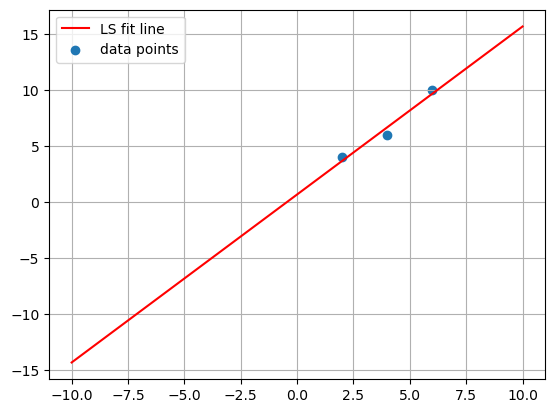

In [28]:
# plot the points and your best fit line using matplotlib to check your work!
fit_line = lambda beta,x: beta[1]*x + beta[0]
x = np.linspace(-10, 10, 100)
y = fit_line(beta,x)
plt.plot(x, y, "r-", label="LS fit line")
plt.scatter([2,4,6], [4,6,10], label="data points")
plt.legend()
plt.grid()
plt.show()